# Analysis of Loan Approval Data

## Task background
In this Portfolio task, we will work on a new dataset named 'Loan Approval' which is a modified version from a synthetic Dataset for Risk Assessment and Loan Approval Modeling (many thanks to LORENZO ZOPPELLETTO for the sharing of this dataset). This dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment and loan approval. In this portfolio part, we are mainly required to train classification models to determine the outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

The dataset includes the following columns:

|Column|Meaning|
|:-----|:-----|
|ApplicationDate| Loan application date|
|Age| Applicant's age|
|AnnualIncome| Yearly income|
|CreditScore| Creditworthiness score|
|EmploymentStatus| Job situation|
|EducationLevel| Highest education attained|
|Experience| Work experience|
|LoanAmount| Requested loan size|
|LoanDuration| Loan repayment period|
|MaritalStatus| Applicant's marital state|
|NumberOfDependents| Number of dependents|
|HomeOwnershipStatus| Homeownership type|
|MonthlyDebtPayments| Monthly debt obligations|
|CreditCardUtilizationRate| Credit card usage percentage|
|NumberOfOpenCreditLines| Active credit lines|
|NumberOfCreditInquiries| Credit checks count|
|DebtToIncomeRatio| Debt to income proportion|
|BankruptcyHistory| Bankruptcy records|
|LoanPurpose| Reason for loan|
|PreviousLoanDefaults| Prior loan defaults|
|PaymentHistory| Past payment behavior|
|LengthOfCreditHistory| Credit history duration|
|SavingsAccountBalance| Savings account amount|
|CheckingAccountBalance| Checking account funds|
|TotalAssets| Total owned assets|
|TotalLiabilities| Total owed debts|
|MonthlyIncome| Income per month|
|UtilityBillsPaymentHistory| Utility payment record|
|JobTenure| Job duration|
|NetWorth| Total financial worth|
|BaseInterestRate| Starting interest rate|
|InterestRate| Applied interest rate|
|MonthlyLoanPayment| Monthly loan payment|
|TotalDebtToIncomeRatio| Total debt against income|
|LoanApproved| Loan approval status|
|RiskScore| Risk assessment score|

## Task Description
The high level goal in this notebook is to build and evaluate predictive models for 'loan approval' from other available features. More specifically, we need to complete the following major tasks:

1. Clean and preprocess the dataset for the downstream data analysis tasks.

2. Build and evaluate logistic regression models with this datasets.

3. Build and evaluate KNN models with this datasets.

## Load the dataset and show the basic information

In [1]:
import pandas as pd

data = pd.read_csv('loan_approval.csv')
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45.0,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,NaN
1,2018-01-02,38.0,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47.0,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,NaN
3,2018-01-04,58.0,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,NaN
4,2018-01-05,37.0,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [3]:
data.describe(include="all")

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000,19900.000000,20000.000000,20000.000000,20000,20000,20000.000000,20000.000000,20000.000000,19900,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,1000.000000
unique,20000,NaN,NaN,NaN,3,5,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2072-09-17,NaN,NaN,NaN,Employed,Bachelor,NaN,NaN,NaN,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,17036,6054,NaN,NaN,NaN,9999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.751759,59161.473550,571.612400,NaN,NaN,17.522750,24882.867800,54.057000,NaN,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.687600
std,NaN,11.630809,40350.845168,50.997358,NaN,NaN,11.316836,13427.421217,24.664857,NaN,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.881033
min,NaN,18.000000,15000.000000,343.000000,NaN,NaN,0.000000,3674.000000,12.000000,NaN,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,30.400000
25%,NaN,31.750000,31679.000000,540.000000,NaN,NaN,9.000000,15575.000000,36.000000,NaN,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,NaN,40.000000,48566.000000,578.000000,NaN,NaN,17.000000,21914.500000,48.000000,NaN,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,NaN,48.000000,74391.000000,609.000000,NaN,NaN,25.000000,30835.000000,72.000000,NaN,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000


## Task 1: Clean the datasets

### Step 1.1 Handle the missing values

In [4]:
# 1.1.1: If over 50% of the values of a column are missing, remove it from the data frame

threshold = 0.5 * len(data)   # Set the threshold to keep columns that have at least 50% non-missing values
data_removed = data.dropna(thresh=threshold, axis=1)   # Remove the columns with more than 50% missing values

In [5]:
# 1.1.2: For a categorical column, if a row contains a missing value, delete the whole row

categorical_column = data_removed.select_dtypes(include=['object']).columns   # Identify categorical columns
data_removed = data_removed.dropna(subset=categorical_column)   # Remove rows with missing values in categorical columns

In [6]:
# 1.1.3: For a numerical column, if a row contains a missing value, perform a missing value imputation with the average value of the column

numerical_column = data_removed.select_dtypes(include=['float64', 'int64']).columns   # Identify numerical columns (both float and integer types)
data_removed[numerical_column] = data_removed[numerical_column].fillna(data_removed[numerical_column].mean())   # Impute missing values in numerical columns with the mean of each column

In [7]:
data_removed.isnull().sum()   # Check missing values after cleaning the dataset

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

### Step 1.2 Handle categorical attributes

In [8]:
# 1.2.1: If all the categorical values of a column are unique, this column does not provide any statistical informaiton and should be deleted

categorical_column = data_removed.select_dtypes(include=['object']).columns   # Identify all categorical columns
for col in categorical_column:
    if data_removed[col].nunique() == len(data_removed):   # Create condition that the number of unique values in the column equals the number of rows
        data_removed = data_removed.drop(col, axis=1)   # Drop the column with unique categorical values

In [9]:
# 1.2.2: Use one hot encoding to convert the categorical values into numerical ones

data_removed = pd.get_dummies(data_removed, drop_first=True)   # Convert categorical values into numerical ones by creating new columns for each category

In [10]:
data_removed.describe()   # Check dataset after adjusting

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
count,19900.000000,19900.000000,19900.000000,19900.000000,19900.000000,19900.000000,19900.000000,19900.000000,19900.000000,19900.000000,...,1.990000e+04,19900.000000,19900.000000,19900.000000,1.990000e+04,19900.000000,19900.000000,19900.000000,19900.000000,19900.000000
mean,39.755455,59149.157739,571.579045,17.527487,24882.674523,54.067538,1.517236,454.374975,0.286349,3.023518,...,3.625414e+04,4890.496202,0.799855,5.002261,7.222712e+04,0.239149,0.239137,911.294816,0.402078,0.238191
std,11.603973,40340.641813,51.016271,11.319663,13434.035867,24.667393,1.386457,240.593139,0.159720,1.737034,...,4.728501e+04,3295.557123,0.120621,2.236853,1.176969e+05,0.035512,0.042195,674.261264,0.338466,0.425987
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,3.720000e+02,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000
25%,32.000000,31688.250000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,1.119500e+04,2630.083333,0.727352,3.000000,8.729250e+03,0.213916,0.209198,493.763700,0.179853,0.000000
50%,40.000000,48577.000000,578.000000,17.000000,21915.500000,48.000000,1.000000,402.000000,0.266640,3.000000,...,2.220050e+04,4035.041667,0.820872,5.000000,3.284550e+04,0.236176,0.235436,728.511452,0.302719,0.000000
75%,48.000000,74372.000000,609.000000,25.000000,30828.250000,72.000000,2.000000,564.000000,0.390576,4.000000,...,4.313500e+04,6161.062500,0.892278,6.000000,8.882125e+04,0.261571,0.265530,1112.478552,0.509294,0.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,1.417302e+06,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000


#### Analysis: 
We addressed missing values through a structured cleaning process to ensure the dataset's integrity. Columns with over 50% missing data were removed to prevent any undue influence on model performance, as such columns provide minimal information and can introduce significant bias. For categorical columns, deleting rows with missing values was necessary because they could disrupt the analysis and lead to incorrect interpretations. In contrast, for numerical columns, we imputed missing values with the mean to retain valuable information while minimizing the impact on overall data distribution.

## Task 2: Build a logistic regression classification model

### Step 2.1 Specify the features and the label, and split the dataset into training data and testing data
1. The attirbute "LoanApproved" is the label, which is the prediction target. The remaining attributes are the features.
2. The ratio for splitting the dataset is 80% for training and 20% for testing.

In [11]:
from sklearn.model_selection import train_test_split   # Import the train_test_split function from the sklearn.model_selection module

In [12]:
X = data_removed.drop('LoanApproved', axis=1)   # Specify features
y = data_removed['LoanApproved']   #Specify label as "LoanApproved"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200000)   # Split the training and testing data
print(X_train.shape)    
print(X_test.shape)

(15920, 44)
(3980, 44)


### Step 2.2 Build a logistic regression model
1. Train a logistic regression model
2. Report two classification performance metrics (accuracy and f1-score) on the testing data

In [13]:
import warnings   # Import to ignore the warning when running the model 
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression   # Import LogisticRegression function 
from sklearn.metrics import accuracy_score, f1_score   # Import the accuracy_score and f1_score functions

In [14]:
model = LogisticRegression(max_iter=100000)  # Increase max_iter for convergence
model.fit(X_train, y_train)   # Train the logistic regression model

# Make predictions of the training and testing data
y_train_pre = model.predict(X_train)
y_test_pre = model.predict(X_test)

# Calculate accuracy and F1-score for training data
train_accuracy = accuracy_score(y_train, y_train_pre)
train_f1 = f1_score(y_train, y_train_pre)

# Calculate accuracy and F1-score for testing data
test_accuracy = accuracy_score(y_test, y_test_pre)
test_f1 = f1_score(y_test, y_test_pre)

# Print results
print("training accuracy:", train_accuracy)
print("training F1-score:", train_f1)
print("testing accuracy:", test_accuracy)
print("testing F1-score:", test_f1)

training accuracy: 0.9096105527638191
training F1-score: 0.8025250445999725
testing accuracy: 0.9133165829145728
testing F1-score: 0.807585052983826


#### Comparison: 
The model's performance on the training and testing sets is quite similar, with only slight differences in accuracy and F1-score. This suggests that the model is generalizing well and is not overfitting, as it performs consistently on both datasets.

### Step 2.3 Perform the recursive feature elimination (RFE) technique to identify the effective features for building the model
1. Visualise the change of the two performance metrics with respect to the number of eliminated features using a line chart.
2. In terms of the visualisation result, we select a good value for the number of eliminated features with considering both performance maximisation and feature minimisation (two competing goals). We then run the RFE again with the chosen number of eliminated features to obtain the corresponding set of retained features.

In [15]:
# Import necessary functions and libaries
import matplotlib.pyplot as plt   
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

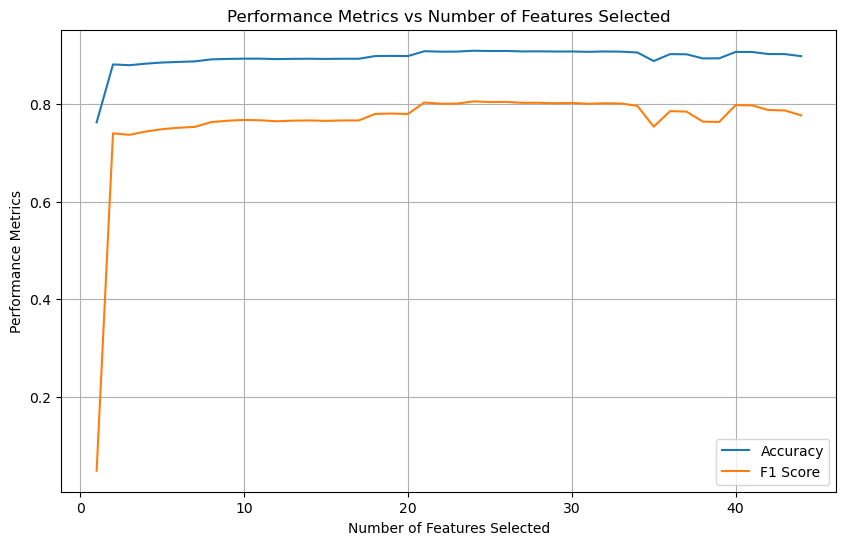

In [16]:
model = LogisticRegression(max_iter=1000)  # More reasonable max_iter

# Create lists to store the number of features and performance metrics
num_features = []
accuracy_scores = []
f1_scores = []

# Perform RFE to eliminate features
for n_features_to_select in range(1, X.shape[1] + 1):
    rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)
    
    # Use cross-validation 
    cv_accuracy = cross_val_score(model, X_train_rfe, y_train, cv=5, scoring='accuracy').mean()
    cv_f1 = cross_val_score(model, X_train_rfe, y_train, cv=5, scoring='f1').mean()

    # Append results
    num_features.append(n_features_to_select)
    accuracy_scores.append(cv_accuracy)
    f1_scores.append(cv_f1)

# Visualize the change of performance metrics
plt.figure(figsize=(10, 6))
plt.plot(num_features, accuracy_scores, label='Accuracy')
plt.plot(num_features, f1_scores, label='F1 Score')
plt.title('Performance Metrics vs Number of Features Selected')
plt.xlabel('Number of Features Selected')
plt.ylabel('Performance Metrics')
plt.legend()
plt.grid()
plt.show()

In [17]:
# Select a good value for the number of features
optimal_num_features = 5  

# Run RFE again with the chosen number of features
final_rfe = RFE(estimator=model, n_features_to_select=optimal_num_features)
final_rfe.fit(X, y)

# Get the retained features
selected_features = X.columns[final_rfe.support_]

# Print the result
print("Selected Features:", selected_features)

Selected Features: Index(['BankruptcyHistory', 'PreviousLoanDefaults', 'BaseInterestRate',
       'InterestRate', 'TotalDebtToIncomeRatio'],
      dtype='object')


#### Analysis: 
We focused on splitting the dataset into features and labels, specifically isolating "LoanApproved" as the target variable for our predictive modeling task. This step is crucial in any supervised learning scenario, as it allows us to define which variables will be used to predict outcomes and which variable is the outcome itself. By separating the dataset into features (independent variables) and the label (dependent variable), we ensure that the machine learning model can learn from the relationships between the features and the target. This knowledge is rooted in the principles of supervised learning, where models are trained to map input variables to a specific output. Isolating the "LoanApproved" label enables the model to focus on learning the patterns and correlations that influence loan approval decisions, thereby improving predictive accuracy. We employed an 80-20 train-test split to create a balanced representation of data for training and validation purposes. This split is essential to evaluate the model's performance accurately and ensures that it can generalize well to unseen data. The use of a fixed random state ensures reproducibility, allowing us to achieve consistent results across multiple runs. By utilizing these data preparation techniques and adhering to established principles of machine learning, we enhance our understanding of the importance of data management in building effective predictive models. This approach not only prepares us for subsequent modeling tasks but also instills a solid foundation in the methodologies employed in data science.

## Task 3: Build a KNN classification model

### Step 3.1 Build 1-NN classifier
1. Slect the features identifed in Step 2.3 for this task
2. Buid 1-NN classifier and report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [18]:
from sklearn.neighbors import KNeighborsClassifier   # Import KNeighborsClassifier

In [19]:
X_train_selected = X_train[selected_features]  # Apply the selected features for training
X_test_selected = X_test[selected_features]  # Apply the selected features for testing

# Create the 1-NN classifier
knn_model = KNeighborsClassifier(n_neighbors=1)  

# Train the classifier on the training data
knn_model.fit(X_train_selected, y_train)

# Make predictions of both training and testing data
y_train_pre = knn_model.predict(X_train_selected)
y_test_pre = knn_model.predict(X_test_selected)

# Calculate performance metrics for training and testing data
accuracy_train = accuracy_score(y_train, y_train_pre)
f1_train = f1_score(y_train, y_train_pre)
accuracy_test = accuracy_score(y_test, y_test_pre)
f1_test = f1_score(y_test, y_test_pre)

# Print results
print("Training Accuracy: ", accuracy_train)
print("Training F1 Score: ", f1_train)
print("Testing Accuracy: ", accuracy_test)
print("Testing F1 Score: ", f1_test)

Training Accuracy:  1.0
Training F1 Score:  1.0
Testing Accuracy:  0.8494974874371859
Testing F1 Score:  0.6777837547068316


#### Comparison: 
The classification metrics, particularly accuracy and F1 score, were significantly higher on the training data compared to the testing data (100%). This suggests that the model has learned the training data patterns too well and may struggle to generalize effectively to new, unseen data, indicating a potential overfitting issue.

### Step 3.2 Use the grid search and cross validation techniques to study the performance change with respect to the hyperparameter K
1. User grid search to search K in the range (1, 30) both inclusive with 5-fold cross validation. The performance metric used for search is accuracy.
2. Visualise the performance change with respect to K using a line chart. Report the two performance metrics for the best case.

In [20]:
# Import necessary functions and libaries
from sklearn.model_selection import GridSearchCV   
import numpy as np

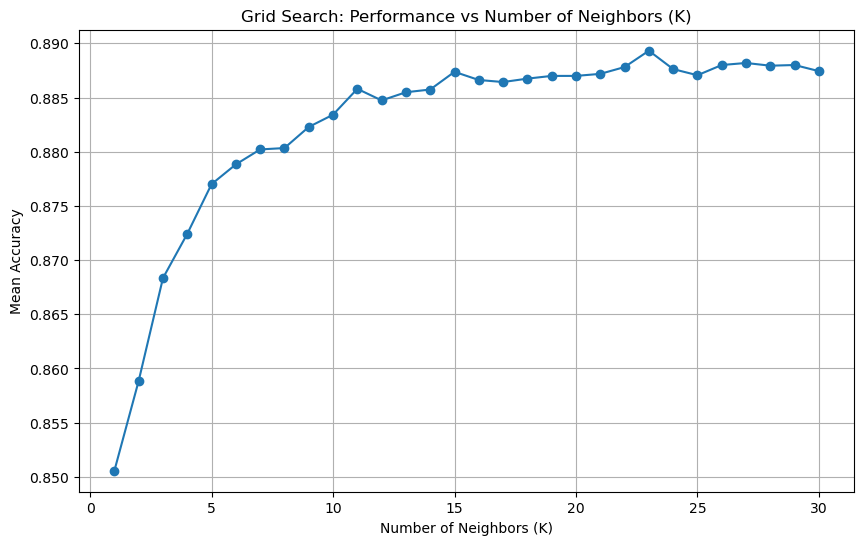

Best K:  23
Training Accuracy:  0.8963567839195979
Training F1 Score:  0.7713414634146342
Testing Accuracy:  0.8949748743718593
Testing F1 Score:  0.7651685393258427


In [21]:
X_train_selected = X_train[selected_features]   # Apply the selected features for training
X_test_selected = X_test[selected_features]   # Apply the selected features for testing

# Define the parameter grid for K
param_grid = {'n_neighbors': np.arange(1, 31)}  # K from 1 to 30

# Create the grid search with 5-fold cross-validation
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='accuracy', cv=5)

# Fit the grid search on the training data
grid_search.fit(X_train_selected, y_train)

# Extract the results
results = grid_search.cv_results_

# Get the mean test scores and corresponding K values
mean_scores = results['mean_test_score']
k_values = results['param_n_neighbors']  # Corrected

# Visualize the performance change with respect to K
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o')
plt.title('Grid Search: Performance vs Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Accuracy')
plt.grid()
plt.show()

# Report metrics for the best case
best_k = grid_search.best_params_['n_neighbors']
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_train_pred_best = best_model.predict(X_train_selected)
y_test_pred_best = best_model.predict(X_test_selected)

# Calculate performance metrics for the best model
accuracy_best_train = accuracy_score(y_train, y_train_pred_best)
f1_best_train = f1_score(y_train, y_train_pred_best)
accuracy_best_test = accuracy_score(y_test, y_test_pred_best)
f1_best_test = f1_score(y_test, y_test_pred_best)

# Print results
print("Best K: ", best_k)
print("Training Accuracy: ", accuracy_best_train)
print("Training F1 Score: ", f1_best_train)
print("Testing Accuracy: ", accuracy_best_test)
print("Testing F1 Score: ", f1_best_test)

### Step 3.3 Study how the distance metrics affect the model performance
1. Change the distance metric parameter to 3 distance types: 'euclidean'(also l2), 'l1', and 'cosine', respectively, and visualise the model performance with these 3 distances, using a bar chart for both accuracy and f1 scores.
2. Compare the performance metrics

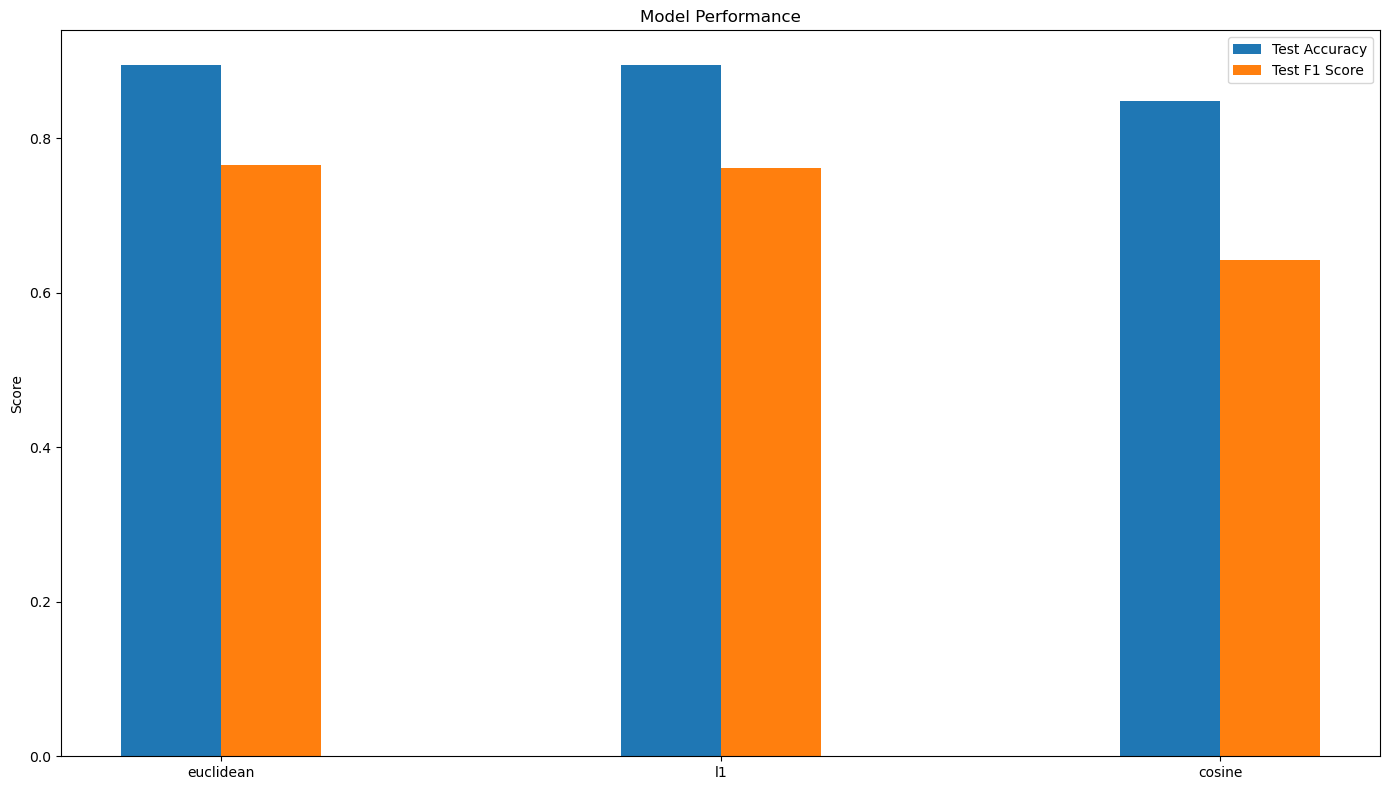

In [22]:
X_train_selected = X_train[selected_features]   # Apply the selected features for training
X_test_selected = X_test[selected_features]   # Apply the selected features for testing

# Define distance metrics to evaluate
distance_metrics = ['euclidean', 'l1', 'cosine']

# Create lists to store performance metrics
accuracy_train_metrics = []
f1_train_metrics = []
accuracy_test_metrics = []
f1_test_metrics = []

for metric in distance_metrics:
    # Create the KNN classifier with the current distance metric
    knn_model = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    
    # Train the model on the training data
    knn_model.fit(X_train_selected, y_train)

    # Make predictions of both training and testing data
    y_train_pred = knn_model.predict(X_train_selected)
    y_test_pred = knn_model.predict(X_test_selected)

    # Calculate performance metrics
    accuracy_train = accuracy_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    
    accuracy_test = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)

    # Append metrics to lists
    accuracy_train_metrics.append(accuracy_train)
    f1_train_metrics.append(f1_train)
    accuracy_test_metrics.append(accuracy_test)
    f1_test_metrics.append(f1_test)

# Visualize the performance metrics
x = np.arange(len(distance_metrics)) 
width = 0.2

fig, ax = plt.subplots(figsize=(14, 8))

# Plot accuracy
ax.bar(x - width/2, accuracy_test_metrics, width, label='Test Accuracy')
ax.bar(x + width/2, f1_test_metrics, width, label='Test F1 Score')

# Add labels and title
ax.set_xticks(x)
ax.set_xticklabels(distance_metrics)
ax.set_title('Model Performance')
ax.set_ylabel('Score')
ax.legend()

plt.tight_layout()
plt.show()

#### Comparison: 
The cosine is the worst method with its score lowest among the three, while euclidean and l1 appear to have just slight diference, both with higher scores among the three.

#### Analysis: 
We provided comprehensive evaluation and optimization of a K-Nearest Neighbors (KNN) classifier. To begin, we employed Recursive Feature Elimination (RFE) to select the most informative features, thereby enhancing model efficiency and reducing overfitting. Next, we implemented a 1-NN classifier and assessed its performance using accuracy and F1 scores on both training and testing data. This analysis helped us identify potential overfitting issues, which can occur when a model memorizes the training data rather than generalizing well to unseen examples. To further optimize the KNN classifier, we conducted a Grid Search with cross-validation to determine the optimal value for the hyperparameter KKK. This involved systematically testing different KKK values and evaluating their impact on model performance. By visualizing the results, we were able to select the KKK value that yielded the highest accuracy. Finally, we explored the influence of various distance metrics (Euclidean, L1, and Cosine) on the KNN classifier's performance. This analysis provided valuable insights into the algorithm's sensitivity to different distance measures and allowed us to choose the most suitable metric for our specific dataset. Through this systematic approach, we were able to build a robust and effective KNN classifier for predicting loan approval outcomes.